# Visualização de Dados

## Matplotlib

A documentação pode ser acessada através do link: [matplotlib](https://matplotlib.org/)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # o objeto Figure será 2x2, ou seja, 4 plots no total. 
ax2 = fig.add_subplot(2, 2, 2) # o terceiro argumento é a posição (quadrante) do plot
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

In [ ]:
import numpy as np
from numpy.random import randn
ax1.plot(randn(50).cumsum(), 'k--')
ax2.hist(randn(100), bins=20, color='g', alpha=0.3)
ax3.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
fig

In [ ]:
l = np.linspace(0, 2, 100)
plt.plot(l, l, label='linear')
plt.plot(l, l**2, label='quadratic')
plt.plot(l, l**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")

plt.legend()
plt.show()

In [ ]:
plt.plot(randn(30).cumsum(), color='r', linestyle='dashed', marker='.');
plt.savefig('plot.png')

**Observação**: para visualizar as opções de cores, marcadores e estilo de linha, use: `plt.plot?`

In [ ]:
plt.plot?

In [ ]:
from datetime import datetime
import pandas as pd

fig, ax = plt.subplots()

data = pd.read_csv("bases/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

#asof = retorna o valor associado a data
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim([datetime(2007,1,1), datetime(2011,1,1)])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008–2009 financial crisis")

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #onde posicionar os ticks no range de dados
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small') #labels dos ticks
ax.set_title('My matplotlib plot')
ax.set_xlabel('Stages')

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(100).cumsum(), 'r', label='one')
ax.plot(randn(100).cumsum(), 'k--', label='two')
ax.plot(randn(100).cumsum(), 'g.', label='three')
ax.legend(loc='best')

**Importante**: É possível fazer a configuração geral dos plots num jupyter notebook. O rcParam cuida disso. A documentação pode ser acessada [aqui](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.rc.html)

A título de exemplo, o código abaixo configura o tamanho dos plots:

In [ ]:
plt.rc("figure", figsize=(10, 10))

## Tipos de Gráficos 

### Barra

In [ ]:
#barra
from matplotlib.ticker import FuncFormatter
x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]
def millions(x, pos):
    'valor e posição'
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, money)
plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
plt.show()

In [ ]:
# Cuidado ao criar gráfico de barras

mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

In [ ]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# misleading y-axis only shows the part above 500
plt.axis([2012.5,2014.5,0,550])
plt.title("Not so Huge Anymore")
plt.show()

### Histograma

In [ ]:
#histograma
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=' + str(mu) + ',\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Barra Empilhada

In [ ]:
# barra empilhada
N = 5
qtde_acoes = np.array([20, 15, 20, 15, 17])
qtde_fiis = np.array([15, 12, 14, 20, 15])
ind = np.arange(N)    
width = 0.35       # largura das barras

p1 = plt.bar(ind, qtde_acoes, width)
p2 = plt.bar(ind, qtde_fiis, width,
             bottom=qtde_acoes)

plt.ylabel('Quantidade de Ativos')
plt.title('Distribuição de Ativos na Carteira')
plt.xticks(ind, ('JAN', 'FEV', 'MAR', 'ABR', 'MAI'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Ações', 'FIIs'))

for x,y,val in zip(ind,qtde_acoes/2, qtde_acoes):
    plt.text(x, y, "%.1d"%val, ha="center", va="center")
for x,y,val in zip(ind,qtde_acoes+qtde_fiis/2, qtde_fiis):
    plt.text(x, y, "%.1d"%val, ha="center", va="center")

plt.show()

### Scatter Plot

In [ ]:
#Scatter-plot
pontos_f = [89, 90, 70, 89, 100, 80, 90, 100, 80, 34]
pontos_m = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
range_pontos = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
feminino = plt.scatter(range_pontos, pontos_f, color='r')
masculino = plt.scatter(range_pontos, pontos_m, color='g')
plt.xlabel('Provas')
plt.ylabel('Pontos')
plt.legend((feminino, masculino),('feminino','masculino'),loc='best')
plt.show()

### Box Plot

In [ ]:
#Box plot
np.random.seed(19680801)

#criando dados fictícios
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)

## Integrando Pandas, Matplotlib e Seaborn

In [ ]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [ ]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

A documentação do Pandas mostra os diversos tipos de plots possíveis de serem criados. [Veja aqui](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

In [ ]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [ ]:
import numpy as np
plt.style.use('classic')
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

In [ ]:
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True);

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
sns.pairplot(iris, hue='species', height=2.5);

## TODO Section

#### Usando o dataset Pokemon.csv, resolva as seguintes questões:

    1) crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo.
    
    2) crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water.
    
    3) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a quantidade de pokemons Lendários e aqueles que não são lendários. Use stacked bar. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
poke = pd.read_csv('bases/Pokemon.csv')
poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


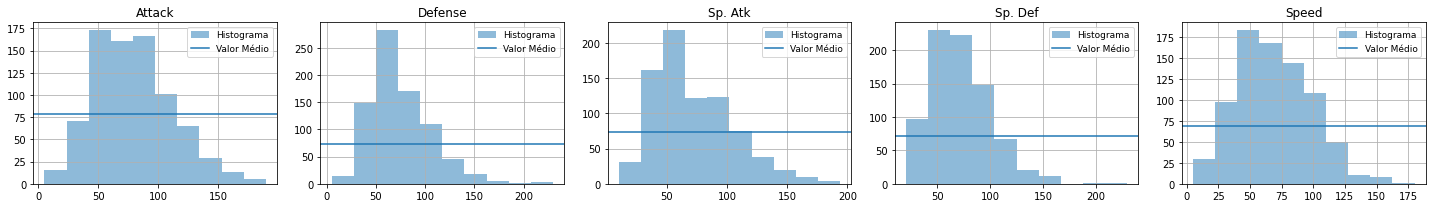

In [77]:
# resposta 1
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize=(20,3))
attribute = ['Attack','Defense','Sp. Atk','Sp. Def','Speed']

for idx in range(5):
    ax[idx].hist(poke[attribute[idx]], alpha=0.5,label='Histograma')
    ax[idx].axhline(y=np.nanmean(poke[attribute[idx]]),label='Valor Médio')
    ax[idx].set_title(attribute[idx])
    ax[idx].grid(True)
    ax[idx].legend(fontsize = 9)

plt.show()

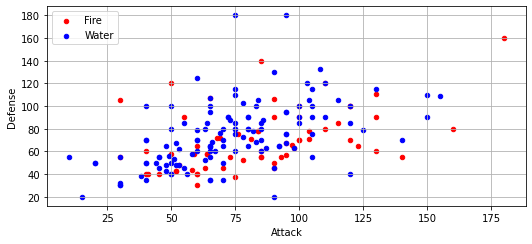

In [84]:
# resposta 2

import numpy as np
import matplotlib.pyplot as plt

attribute = ['Attack','Defense']
eixo_x = attribute[0]
eixo_y = attribute[1]


df1 = poke[(poke['Type 1'] == 'Fire') | (poke['Type 2']=='Fire')]
df2 = poke[(poke['Type 1'] == 'Water') | (poke['Type 2']=='Water')]


ax = df1.plot(x=eixo_x, y=eixo_y, kind='scatter', c='r', label='Fire'  )
df2.plot(x=eixo_x, y=eixo_y, kind='scatter', ax=ax, c='b', label='Water')
ax.grid(True)
plt.show()



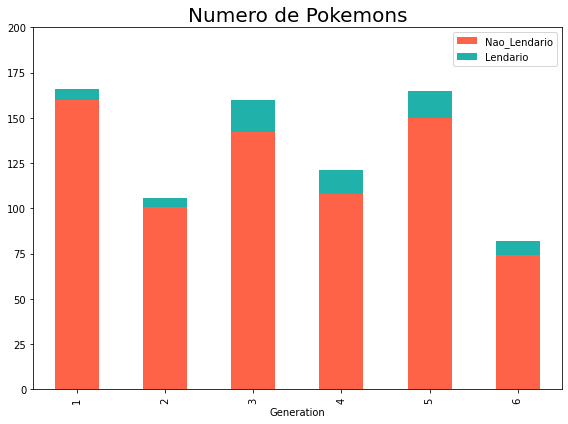

In [85]:
# resposta 3

poke_n_lendario = poke[poke['Legendary']== False]
poke_lendario = poke[poke['Legendary'] == True]


poke_n_lendario = poke_n_lendario[['Generation','Legendary']].groupby('Generation').agg({'Legendary':'count'}).reset_index()
poke_lendario = poke_lendario[['Generation','Legendary']].groupby('Generation').agg({'Legendary':'count'}).reset_index()


df = pd.DataFrame ({'Generation':poke_lendario['Generation'], 'Nao_Lendario':poke_n_lendario['Legendary'],'Lendario':poke_lendario['Legendary']})


ax = df.plot.bar(x='Generation', stacked=True, color=['tomato','lightseagreen'], figsize=(8,6))
ax.set_title('Numero de Pokemons', fontsize=20)
ax.set_ylim(0,200)
plt.show()